### Load Data and Run Strategy

In [3]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

ROOT = Path().resolve().parent #points to project/
sys.path.append(str(ROOT)) 

from strategies.rsi_mean_reversion import rsi_mean_reversion
from backtesting.backtester import Backtester

#load cleaned data
df = pd.read_csv(
    "../data/processed/SPY_clean.csv",
    index_col=0,
    parse_dates=True #converts dates to date time objects not strings
)

#generate RSI signals
signals = rsi_mean_reversion(
    prices=df["close"],
    window=14,
    lower_thresh=30,
    upper_thresh=70
)

#add returns
signals["returns"] = df["returns"]

#run backtest
bt = Backtester(signals)
results = bt.run()




### Plot Portfolio Value Over Time

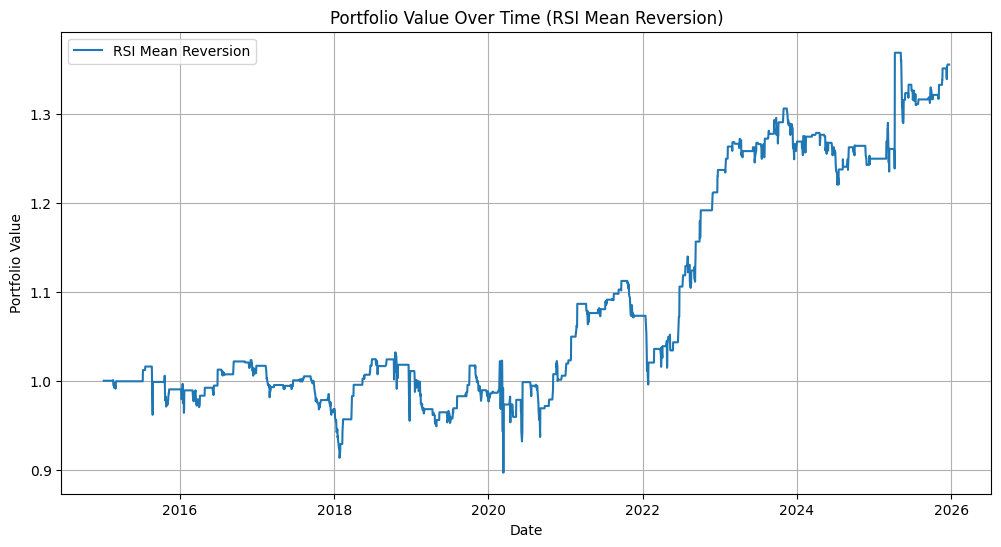

In [5]:
portfolio_value = (1 + results["strategy_returns"]).cumprod()

plt.figure(figsize=(12,6))
plt.plot(portfolio_value, label="RSI Mean Reversion")
plt.title("Portfolio Value Over Time (RSI Mean Reversion)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()

### Plot RSI and Thresholds

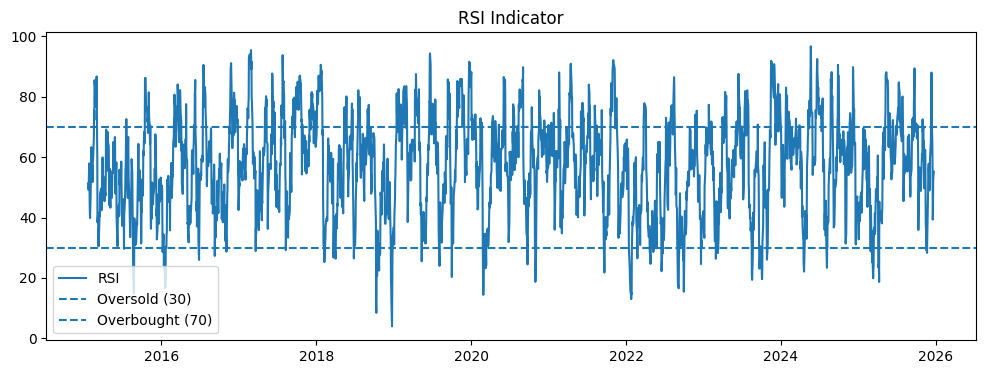

In [6]:
plt.figure(figsize=(12,4))
plt.plot(signals["rsi"], label="RSI")
plt.axhline(30, linestyle="--", label="Oversold (30)")
plt.axhline(70, linestyle="--", label="Overbought (70)")
plt.title("RSI Indicator")
plt.legend()
plt.show()
